In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
fname='karate.gml'
K=nx.read_gml(fname)

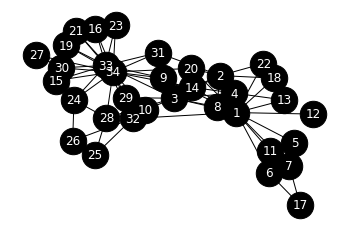

In [2]:
nx.draw_networkx(K, node_color='black',
font_color='white',
node_size=700,
pos=nx.spring_layout(K))
limits =plt.axis('off')
plt.show()

In [3]:
print(nx.info(K))

Graph with 34 nodes and 78 edges


C:\Users\NORA JDK\AppData\Local\Temp\ipykernel_6448\3732228293.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(K))


In [4]:
K.degree(['1','34'])

DegreeView({'1': 16, '34': 17})

In [103]:
print(nx.info(K,'1'))

print(nx.info(K,'34'))

Node 1 has the following properties:
Degree: 16
Neighbors: 2 3 4 5 6 7 8 9 11 12 13 14 18 20 22 32
Node 34 has the following properties:
Degree: 17
Neighbors: 9 10 14 15 16 19 20 21 23 24 27 28 29 30 31 32 33


C:\Users\NORA JDK\AppData\Local\Temp\ipykernel_6448\3576992942.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(K,'1'))
C:\Users\NORA JDK\AppData\Local\Temp\ipykernel_6448\3576992942.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(K,'34'))


Kulüp ikiye bölündükten sonra her iki taraf için sözlük oluşturuldu.

In [6]:
mr_hi =[*range(1, 10), *range(11, 15),
    17, 18,20,22]
club = {}
for m in range(1,35):
    if m in mr_hi:
        club[str(m)] ="Mr.  Hi"
    else:
        club[str(m)] ="John A."

Sözlüğü ağımıza ekleyelim.

In [7]:
nx.set_node_attributes(K, club,'club')
nodes=K.nodes(data=True)


Eklenenler kontrol edildi.

In [8]:
 print(list(nodes)[:3])

[('1', {'club': 'Mr.  Hi'}), ('2', {'club': 'Mr.  Hi'}), ('3', {'club': 'Mr.  Hi'})]


9.düğümün derecesine bakalım.

In [9]:
kdeg=K.degree()
kdeg['9']

5

Düğümlerin derecelerini, büyüklüklerini kodlayan ve yeni kulüplerin üyeliğine göre renklendiren bir ağ oluşturabiliriz. Kullanacağımız renk haritasını tanımlayarak başlayalım.

In [27]:
import itertools
nodes = K.nodes(data=True)
clubs =set(nx.get_node_attributes(K,\
'club').values())
mapping =dict(zip(sorted(clubs),\
    itertools.count()))
colors =list(mapping[n[1]['club']]for n\
    in nodes)

Grafiğimizi çizelim.

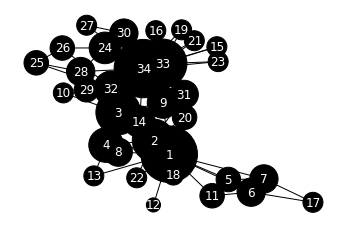

In [11]:
nx.draw_networkx(K, node_color='black',
font_color='white',
node_size=[200*val for(node,val) in kdeg])
limits =plt.axis('off')
plt.show()

En büyük düğümler 1,34,33 gibi görünüyor Bunu hesapladığımız bilgilerle doğrulayalım.

In [12]:
def get_top_nodes(cdict, num=5):
    top_nodes = {}
    for i in range(num):
        top_nodes =dict(
            sorted(cdict.items(), key=lambda x:x[1],
                reverse=True)[:num]
        )
    return top_nodes
get_top_nodes(dict(kdeg))

{'34': 17, '1': 16, '33': 12, '3': 10, '2': 9}

Dereceleri degree_centrality ile hesaplayalım.

In [13]:
degree_centrality =nx.degree_centrality(K)
nx.set_node_attributes(K,\
    degree_centrality, 'dc')

    Verilenlerle derece merkezliğinin histogramına bakmak için kullanabiliriz.
    Histogram: Gruplandırılmış bir veri dağılımının sütun grafiğiyle gösterimidir

In [14]:
deg_values = sorted(set(degree_centrality.\
    values()))

from collections import Counter

value_counts = Counter(degree_centrality.values())
deg_hist = [value_counts[x] for x in deg_values]

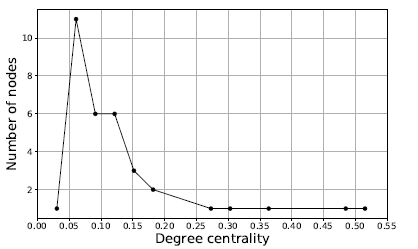

In [15]:
Image("deg_hist.png")

       Merkeziyet derecesi sayesinde grafik daha görünür oldu. Bu sayede sadece düğüm 1,34 veya 33'ün önemi değil aynı zamanda 2 ve 3'ün de önemini de görebiliriz.

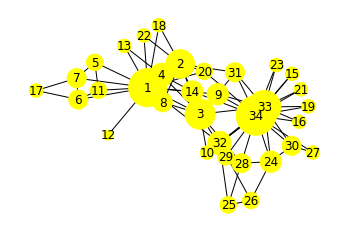

In [26]:
nx.draw_networkx(K, node_color='yellow',
    node_size=[3000 * v for v in
        nx.get_node_attributes(K, 'dc').values()])
limits =plt.axis('off')
plt.show()

    Grafın arasındalık merkeziliği (betweenness centrality) bulalım.
    betweenness bir grafın farklı bileşenleri arasında bir köprü görevi görür.

In [43]:
betweenness_centrality =\
    nx.betweenness_centrality(K)
nx.set_node_attributes(K,
    betweenness_centrality, 'bc')

İlk 5 düğümü birbirine bağlayarak bu köprülere göz atalım

In [33]:
get_top_nodes(betweenness_centrality)

{'1': 0.43763528138528146,
 '34': 0.30407497594997596,
 '33': 0.145247113997114,
 '3': 0.14365680615680618,
 '32': 0.13827561327561325}

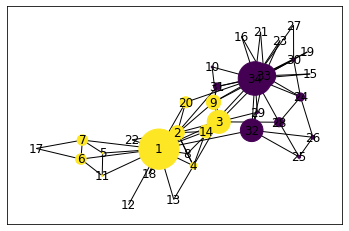

In [64]:
nx.draw_networkx(K, node_color=colors,
    node_size=[3700 * v for v in
        nx.get_node_attributes(K, 'bc').values()])

Closeness_ centrality ağdaki düğümlerin yakınlığını hesaplar. Bu sayede ağdaki 'en yakın düğümleri bulalım'

In [65]:
closeness_centrality =nx.closeness_centrality(K)
nx.set_node_attributes(K,
    closeness_centrality, 'cc')
get_top_nodes(closeness_centrality)

{'1': 0.5689655172413793,
 '3': 0.559322033898305,
 '34': 0.55,
 '32': 0.5409836065573771,
 '9': 0.515625}

    Ağı istedğimiz şekilde oluşturalım.
    Kenarlar için edges, düğümler için nodes, etiketler için labels kullanılır.

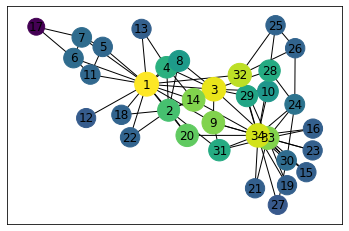

In [73]:
pos =nx.spring_layout(K)
ec =nx.draw_networkx_edges(K, pos=pos)
nc =nx.draw_networkx_nodes(K, pos=pos,
    node_color=[v for v in
        nx.get_node_attributes(K, 'cc').values()],
    node_size=[1000 * v for v in
        nx.get_node_attributes(K, 'cc').values()])
lb =nx.draw_networkx_labels(K,pos =pos)

    Özvektör merkezini hesaplayalım
    Graf teorisinde, özvektör merkeziliği, bir ağdaki bir düğümün etkisinin bir ölçüsüdür.

In [75]:
eigenvector_centrality =\
    nx.eigenvector_centrality(K)
nx.set_node_attributes(K, eigenvector_centrality,'ec')

get_top_nodes(eigenvector_centrality)

{'34': 0.373371213013235,
 '1': 0.3554834941851943,
 '3': 0.3171893899684447,
 '33': 0.30865104773369595,
 '2': 0.2659538704545025}

    John A'nın(node34), Bay Hi'den (node1) daha yüksek özvektör merkezliğine sahip olduğunu gördük.
    Özvektör merkezliğini grafiğe dökelim.

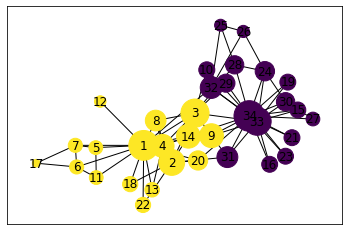

In [84]:
nx.draw_networkx(K, node_color=colors,
    node_size=[2500 * v for v in
        nx.get_node_attributes(K, 'ec').values()])

Kitapta aşağıdaki gibi verilmiştir.

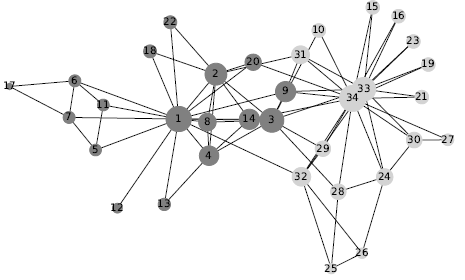

In [89]:
Image("merkezlik.png")

Ağdaki bazı düğümleri kaldırabiliriz.

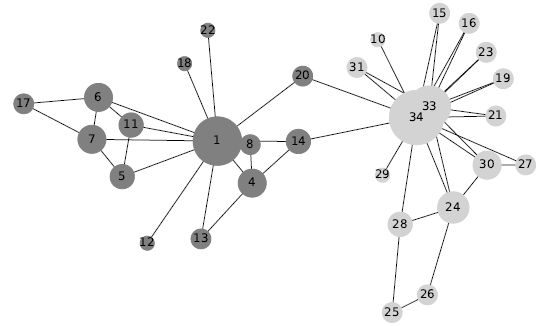

In [102]:
k =K.copy()
k.remove_nodes_from(['2', '3','32','9'])

Image("removemerkezlik.png")

    Dendrogram: Bir ağacı temsil eden bir diyagramdır. Hiyerarşik kümelemede, ilgili analizler            tarafından üretilen kümelerin düzenini gösterir.
    
     Ağımızdaki hiyerarşik kümelemeyi hesaplamak için scipy kullanıyoruz.

Ağımızın Dendogramını oluşturalım

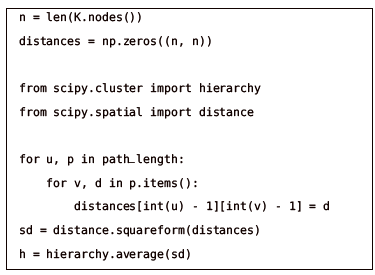

In [99]:
Image("dendrogramCode.png")

    
    Zachary'nin hiyerarşik kümelemesi

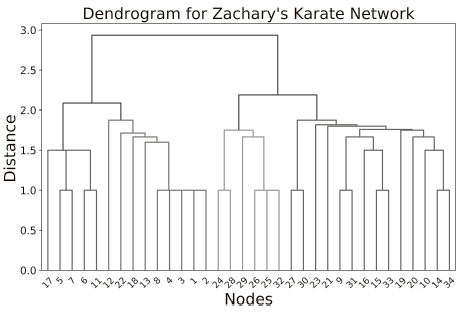

In [100]:
Image("dendrogram.png")